In [5]:
import pandas as pd

# Important

Jika ada hal yang dirasa abu-abu, silahkan jawab jawaban dengan asumsi logis yang anda miliki.  
Penilaian tugas tidak hanya sekedar dilihat dari hasil yang dikeluarkan, melainkan penjelasan atas langkah-langkah yang anda ambil dalam analisis. Sertakan penjelasan dengan menggunakan simbol komentar.  
Kualitas seorang Data Analyst yang baik adalah mampu menyampaikan analisis dengan baik.

Definisi data : https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset?select=events.csv  
Kita hanya akan menggunakan file events.csv jadi pastikan kalian telah memahami data dengan baik sebelum mulai mengerjakan homework ini

In [8]:
import os
print(os.listdir('archive'))



['category_tree.csv', 'events.csv', 'item_properties_part1.csv', 'item_properties_part2.csv']


In [9]:
df = pd.read_csv('archive/events.csv')
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')# Data awalnya merupakan linux timestamp, akan dikonversikan menjadi format datetime standard pandas

In [10]:
df['date_key'] = df['datetime'].dt.normalize() # mereset komponen jam pada datetime sehingga hanya menggunakan tanggal

In [12]:
print(df.columns)
df.head()


Index(['timestamp', 'visitorid', 'event', 'itemid', 'transactionid',
       'datetime', 'date_key'],
      dtype='object')


,timestamp,visitorid,event,itemid,transactionid,datetime,date_key
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,2015-06-02
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,2015-06-02
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,2015-06-02
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,2015-06-02
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,2015-06-02


In [13]:
# TULIS CODE ANDA DISINI
df_transaction = df[df['event'] == 'transaction'] #Filter transaksi saja
df_daily = df_transaction.groupby(['date_key', 'itemid']).size().reset_index(name='transaction') #Group per hari (`date_key`) dan per item (`itemid`), lalu hitung jumlah transaksi
# df_daily = ...... # tidak harus 1 line saja

In [14]:
df_daily.sort_values('transaction') #Sort nilai transaksi:


,date_key,itemid,transaction
20641,2015-09-18,21970,1
20625,2015-09-17,309949,1
20626,2015-09-17,326819,1
20627,2015-09-17,334714,1
20628,2015-09-17,344902,1
...,...,...,...
17503,2015-08-25,248455,6
11583,2015-07-16,445351,6
18223,2015-08-30,173653,6
17472,2015-08-25,134484,6


In [15]:
#memastikan hasil
df_daily.head()
df_daily.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20655 entries, 0 to 20654
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_key     20655 non-null  datetime64[ns]
 1   itemid       20655 non-null  int64         
 2   transaction  20655 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 484.2 KB


# 1. Data Preprocessing
Data pada level transaksi dan belum siap digunakan untuk analisis harian.  
Lakukan data preprocessing dengan pandas sesuai dengan materi yang sudah ada pelajari sehingga data di rekap dalam level harian untuk setiap itemid seperti berikut : 

In [27]:
# CODE INI JANGAN DI RUN DULU
df_daily.sort_values('transaction')

event,date_key,itemid,addtocart,transaction,view
0,2015-05-03,16,0.0,0.0,1.0
1111440,2015-07-30,48460,0.0,0.0,1.0
1111439,2015-07-30,48451,0.0,0.0,1.0
1111438,2015-07-30,48425,0.0,0.0,2.0
1111436,2015-07-30,48360,0.0,0.0,1.0
...,...,...,...,...,...
1463585,2015-08-30,173653,7.0,6.0,21.0
936990,2015-07-16,445351,7.0,6.0,42.0
1405839,2015-08-25,134484,6.0,6.0,17.0
1408811,2015-08-25,248455,7.0,6.0,45.0


In [18]:
top_items = df_daily.groupby('itemid')['transaction'].sum().sort_values(ascending=False).head(10)
top_items #Top 10 Produk dengan Penjualan Terbanyak


itemid
461686    133
119736     97
213834     92
7943       46
312728     46
445351     45
48030      41
248455     38
420960     38
17478      37
Name: transaction, dtype: int64

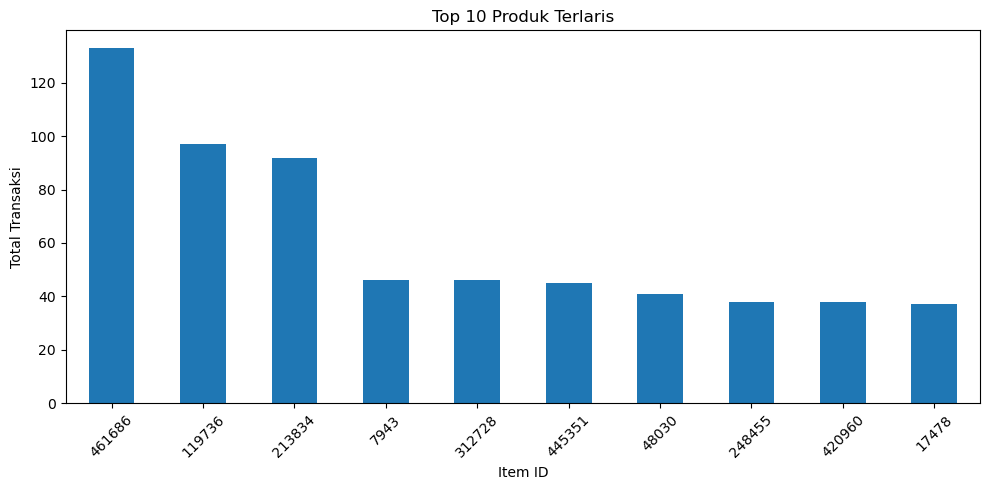

In [19]:
#Top 10 Produk Terlaris
import matplotlib.pyplot as plt

top_items.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Produk Terlaris')
plt.xlabel('Item ID')
plt.ylabel('Total Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


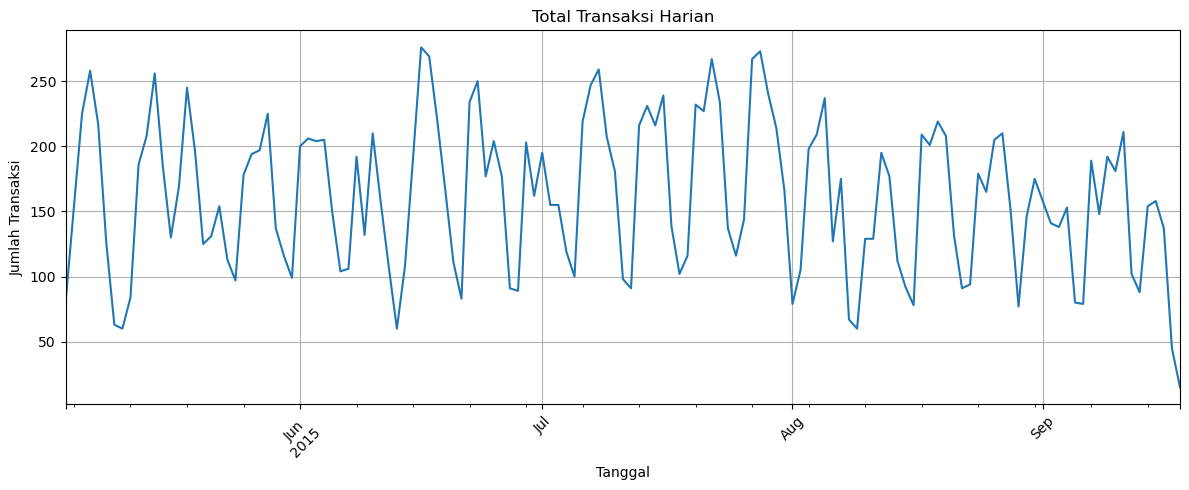

In [20]:
# Tren Penjualan Harian (semua produk)
daily_sales = df_daily.groupby('date_key')['transaction'].sum()

daily_sales.plot(figsize=(12, 5))
plt.title('Total Transaksi Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Data Analysis
Gunakan df_daily sesuai soal nomor 1.  
Apabila tidak bisa menjawab soal nomor 1, harap gunakan file df_daily_item_activity.csv sebagai penggantinya.

## 2.a Setelah melakukan rekap harian per produk, coba lakukan rekap harian secara total.  
Rekap harian secara total artinya hitung berapa banyak total view yang terjadi, total addtocart yang terjadi dan total transaction yang terjadi di setiap harinya

## 2.b Setelah membuat rekap harian secara total, buatlah visualisasi yang menggambarkan pergerakan setiap event di setiap harinya dan BERIKAN MINIMAL 2 INSIGHT/ANALISIS dari grafik.

## 2.c Apakah ada kendala dari proses addtocard hingga customer melakukan transaction? Gunakan funnel analysis untuk mencari tahu.

In [31]:
#Jawaban 2a
df_total_daily = df_daily.groupby('date_key')[['view', 'addtocart', 'transaction']].sum().reset_index()
df_total_daily.head() #Rekap Harian Secara Total



,date_key,view,addtocart,transaction
0,2015-05-03,13304,296,83
1,2015-05-04,18681,579,154
2,2015-05-05,22225,565,225
3,2015-05-06,23015,647,258
4,2015-05-07,22369,578,217


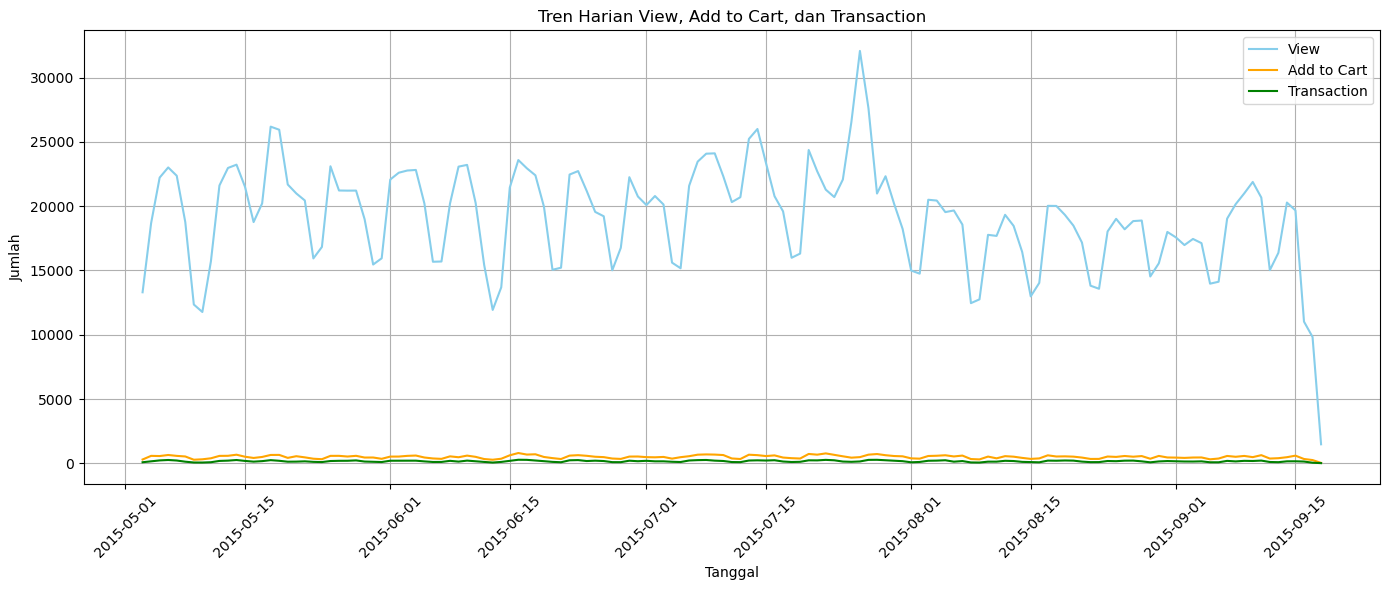

In [33]:
# Jawaban 2b

plt.figure(figsize=(14, 6))
plt.plot(df_total_daily['date_key'], df_total_daily['view'], label='View', color='skyblue')
plt.plot(df_total_daily['date_key'], df_total_daily['addtocart'], label='Add to Cart', color='orange')
plt.plot(df_total_daily['date_key'], df_total_daily['transaction'], label='Transaction', color='green')

plt.title('Tren Harian View, Add to Cart, dan Transaction')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [35]:
df_total_daily['view_to_cart'] = df_total_daily['addtocart'] / df_total_daily['view']
df_total_daily['cart_to_transaction'] = df_total_daily['transaction'] / df_total_daily['addtocart']


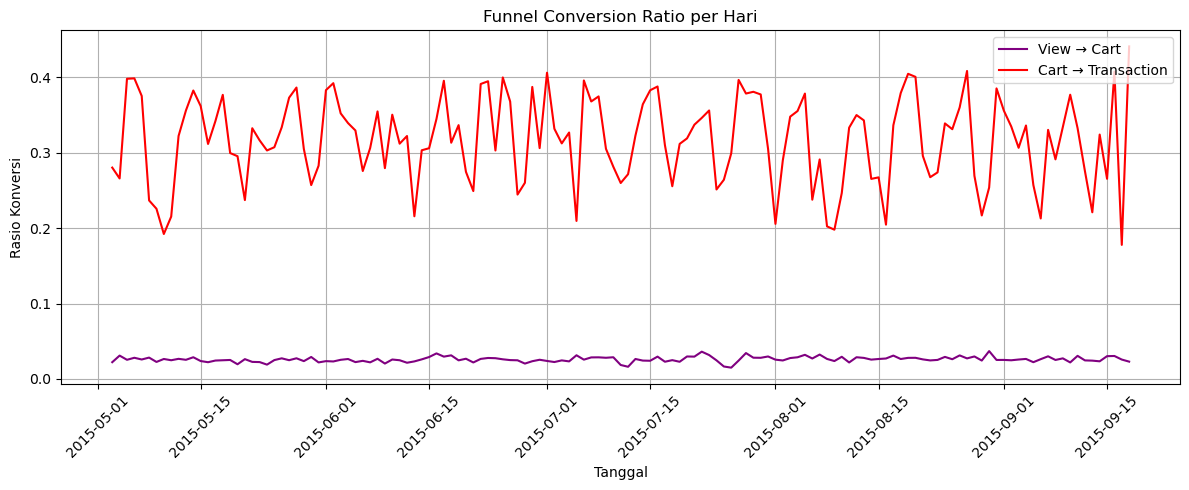

In [36]:
plt.figure(figsize=(12, 5))
plt.plot(df_total_daily['date_key'], df_total_daily['view_to_cart'], label='View → Cart', color='purple')
plt.plot(df_total_daily['date_key'], df_total_daily['cart_to_transaction'], label='Cart → Transaction', color='red')

plt.title('Funnel Conversion Ratio per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Rasio Konversi')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<!-- Jawaban Insight untuk 2.c: -->
Rasio Cart → Transaction sering drop drastis, menandakan mungkin ada kendala pada saat checkout (harga, stok, dll).

Rasio View → Cart stabil, menandakan produk menarik namun proses beli bermasalah.



# 3. RF Analysis

Karena pada data ini tidak ada informasi mengenai nilai dari item yang dibeli, maka analisis akan mengabaikan komponen M.

## 3.a Hitunglah sudah berapa hari sejak customer terakhir kali melakukan transaksi. 
Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa hari sejak transaksi berlalu

## 3.b berdasarkan hasil sebelumnya, bagi customer menjadi 4 kelompok berdasarkan aspek waktu transaksi terakhir.

In [82]:
# CONTOH HASIL
latest_transaction

,visitorid,days_since_last_transaction,R_score
1465072,869008,138,1
1463096,345781,138,1
1464289,586756,138,1
1463462,435495,138,1
1464041,266417,138,1
...,...,...,...
1456595,751256,0,4
1460839,1298462,0,4
1457781,62004,0,4
1457810,427756,0,4


Jawaban 3a:

In [46]:
# Filter transaksi
df_transaction = df[df['event'] == 'transaction']


In [47]:
# Ambil tanggal terakhir per customer
last_transaction = df_transaction.groupby('visitorid')['date_key'].max().reset_index()
last_transaction.columns = ['visitorid', 'last_transaction_date']


In [48]:
# Hitung selisih hari dari transaksi terakhir ke tanggal maksimal
max_date = pd.to_datetime(df['date_key']).max()
last_transaction['days_since_last_transaction'] = (max_date - pd.to_datetime(last_transaction['last_transaction_date'])).dt.days


Jawaban 3b:

In [49]:
# Buat R_score (semakin kecil jarak harinya, semakin tinggi skornya)
last_transaction['R_score'] = pd.qcut(
    last_transaction['days_since_last_transaction'],
    q=4,
    labels=[4, 3, 2, 1]  # 4 = paling baru transaksi
)


In [50]:
# Simpan ke latest_transaction
latest_transaction = last_transaction[['visitorid', 'days_since_last_transaction', 'R_score']]


In [56]:
# Cek hasil akhir
latest_transaction.head()


,visitorid,days_since_last_transaction,R_score
0,172,34,4
1,186,37,4
2,264,11,4
3,419,51,3
4,539,94,2


In [51]:
# atau Lanjutkan dengan melihat value_counts
latest_transaction['R_score'].value_counts().sort_index()


R_score
4    2995
3    2900
2    2960
1    2864
Name: count, dtype: int64

In [52]:
#atau bisa dengan cara ini
from IPython.display import display
display(latest_transaction)


,visitorid,days_since_last_transaction,R_score
0,172,34,4
1,186,37,4
2,264,11,4
3,419,51,3
4,539,94,2
...,...,...,...
11714,1406787,109,1
11715,1406981,123,1
11716,1407070,128,1
11717,1407110,45,3


In [54]:
# Tampilan 10 teratas
latest_transaction.head(10)



,visitorid,days_since_last_transaction,R_score
0,172,34,4
1,186,37,4
2,264,11,4
3,419,51,3
4,539,94,2
5,627,29,4
6,795,39,3
7,914,31,4
8,964,66,3
9,1032,84,2


In [55]:
# Tampilan 10 terbawah
latest_transaction.tail(10)

,visitorid,days_since_last_transaction,R_score
11709,1405861,121,1
11710,1405929,15,4
11711,1406087,108,1
11712,1406564,23,4
11713,1406708,11,4
11714,1406787,109,1
11715,1406981,123,1
11716,1407070,128,1
11717,1407110,45,3
11718,1407398,73,2


# 3.c Hitunglah banyaknya transaksi yang dilakukan oleh setiap uservisitor 
Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa banyak transaksi yang telah dilakukan

# 3.d berdasarkan hasil sebelumnya, bagi customer menjadi 4 kelompok berdasarkan banyaknya transaksi yang dilakukan

In [57]:
# 1. Filter hanya event 'transaction'
df_transaction = df[df['event'] == 'transaction']

In [58]:
# 2. Hitung jumlah transaksi per visitor
transaction_count = df_transaction.groupby('visitorid').size().reset_index(name='total_transaction')

In [59]:
transaction_count.head()

,visitorid,total_transaction
0,172,2
1,186,1
2,264,2
3,419,1
4,539,1


Jawaban 3D:

In [60]:
# Hitung dulu total transaksi per visitorid (jika belum)
df_transaction = df[df['event'] == 'transaction']
transaction_count = df_transaction.groupby('visitorid').size().reset_index(name='total_transaction')


In [62]:
# Gunakan pd.cut() dengan interval buatan sendiri (manual binning)
transaction_count['F_score'] = pd.cut(
    transaction_count['total_transaction'],
    bins=[0, 1, 2, 5, transaction_count['total_transaction'].max()],
    labels=[1, 2, 3, 4],
    include_lowest=True
)



In [63]:
#cek hasil
transaction_count['F_score'].value_counts().sort_index()


F_score
1    9143
2    1549
3     733
4     294
Name: count, dtype: int64

# 3.e gabungkan hasil 3.b dan 3.d kedalam suatu dataframe dan lakukan analisis mengenai karakteristik customers dari aspek RF. Apa yang bisa disimpulkan ?

In [64]:
# latest_transaction → dari 3.b, berisi: visitorid, days_since_last_transaction, R_score
# transaction_count → dari 3.d, berisi: visitorid, total_transaction, F_score

# Gabungkan
rf_table = pd.merge(latest_transaction, transaction_count[['visitorid', 'total_transaction', 'F_score']], on='visitorid', how='inner')


In [65]:
# Tambahkan gabungan kolom RF
rf_table['RF_group'] = rf_table['R_score'].astype(str) + rf_table['F_score'].astype(str)

In [66]:
# Distribusi RF Group
rf_summary = rf_table.groupby(['R_score', 'F_score']).size().reset_index(name='jumlah_customer')
print(rf_summary)


   R_score F_score  jumlah_customer
0        4       1             2312
1        4       2              397
2        4       3              191
3        4       4               95
4        3       1             2217
5        3       2              402
6        3       3              202
7        3       4               79
8        2       1             2361
9        2       2              358
10       2       3              174
11       2       4               67
12       1       1             2253
13       1       2              392
14       1       3              166
15       1       4               53


C:\Users\Ichsa\AppData\Local\Temp\ipykernel_15552\1482957395.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rf_summary = rf_table.groupby(['R_score', 'F_score']).size().reset_index(name='jumlah_customer')


In [68]:
# PVT untuk heatmap
rf_summary = rf_table.groupby(['R_score', 'F_score']).size().reset_index(name='jumlah_customer')
rf_matrix = rf_summary.pivot(index='R_score', columns='F_score', values='jumlah_customer')
rf_matrix = rf_matrix.fillna(0).astype(int)  # Pastikan bisa divisualisasikan


C:\Users\Ichsa\AppData\Local\Temp\ipykernel_15552\1446039335.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rf_summary = rf_table.groupby(['R_score', 'F_score']).size().reset_index(name='jumlah_customer')


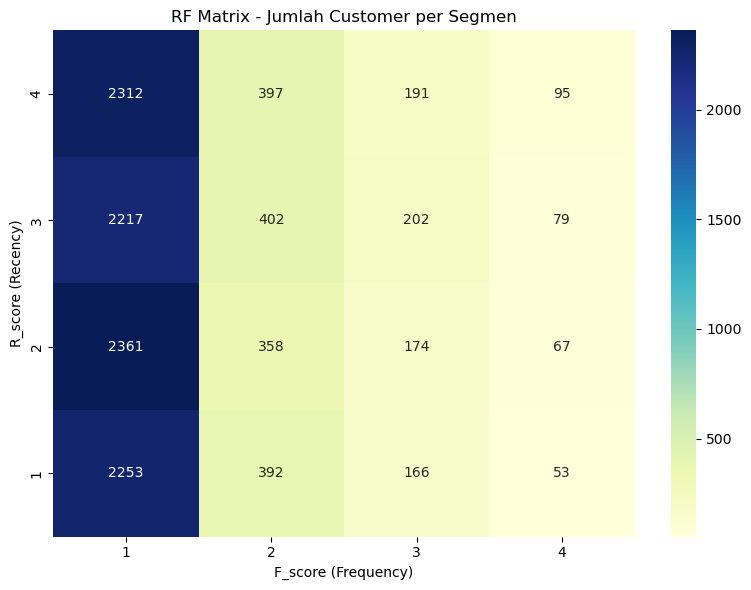

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(rf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('RF Matrix - Jumlah Customer per Segmen')
plt.xlabel('F_score (Frequency)')
plt.ylabel('R_score (Recency)')
plt.tight_layout()
plt.show()
